# This is a code to Dawnload the CMIP6 Data from different modeles for any area for all ssp Scenario

In [ ]:
# first install and improt the requared packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs

In [ ]:
#Data search
#The CMIP6 data catalog is stored as a CSV file. We can read it with Pandas

In [2]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [ ]:
#Next, we will filter the data to find monthly tas, tasmax,tasmin and pr for historical and ssp experiments for CanESM5
# but you can also use any other model as you want

In [3]:
df_ta = df.query("table_id == 'Amon' & source_id == 'CanESM5' & variable_id == ['tas','tasmax','tasmin','pr'] & experiment_id == ['historical','ssp119','ssp126','ssp245','ssp370','ssp585'] & member_id =='r1i1p1f1'")
df_ta


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56668,ScenarioMIP,CCCma,CanESM5,ssp119,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190306
57314,ScenarioMIP,CCCma,CanESM5,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190306
57316,ScenarioMIP,CCCma,CanESM5,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190306
57339,ScenarioMIP,CCCma,CanESM5,ssp126,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190306
84643,ScenarioMIP,CCCma,CanESM5,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
86050,ScenarioMIP,CCCma,CanESM5,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
94450,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
94451,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
94452,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
97575,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429


In [ ]:
# the above rur what does this tell us is This dataframe tells us that the data we are looking for is available in the CMIP6 Google 
# Cloud archive and the zstore column tells us where to find each file.

In [ ]:
# Accessing publicly available data on Google Cloud
# To access Google Cloud, we need to gain access using the gcsfc package. 
# We will only be accessing publicly available data, so we can use an anonymous access mode of user authentication.

In [4]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [ ]:
#Now that we have access to Google Cloud, let’s take a look at the first file location.

In [5]:
# Get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ta.zstore.values[0]
print(zstore)

gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp119/r1i1p1f1/Amon/tasmin/gn/v20190306/


In [ ]:
# What we see if a path to the file location. 
# We will use this path to open the file. There are two steps involved. 
# The first is to create an interface to the file using the above path and the second is to open the file using the interface.

In [6]:
# Create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# Open it using xarray and zarr
file1 = xr.open_zarr(mapper, consolidated=True)
file1

<xarray.Dataset>
Dimensions:    (lat: 64, bnds: 2, lon: 128, time: 1032)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 ...
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 ...
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object ...
Dimensions without coordinates: bnds
Data variables:
    tasmin     (time, lat, lon) float32 ...
Attributes: (12/56)
    CCCma_model_hash:            05c0a773433926e46ebc3af8139a0b5aa217871d
    CCCma_parent_runid:          rc3.1-his01
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s1901
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/eb67f982-985e-4568-9e9b-eb966c1...
    variable_id:                 tasmin
    variant_label:               r1i1p1f1
    version:                     v20190429
    netcdf_tracking_ids:         hdl:21.14100/eb67f982-985e-4568-9e9b-eb966c1...
    version_id:                  v20190306

In [ ]:
# We can now see the structure of the data, e.g., we can see the dimensions, the coordinates, the variables and the attributes (aka the metadata). 
# To explore the data a bit more, let’s revise our search so that we can start to compare the daily CanESM5 data for 
# the Arbaminch location with our station data for the daily precipitation.
# Notice how the table_id has been changed to ‘day’

In [7]:
df_pr = df.query("table_id == 'day' & source_id == 'CanESM5' & variable_id == 'pr' & experiment_id == 'historical' & member_id =='r1i1p1f1'")
df_pr

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
99352,CMIP,CCCma,CanESM5,historical,r1i1p1f1,day,pr,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429


In [ ]:
# We have only one file rain fall historical . Let’s open it. but you can also do for 'tas','tasmax','tasmin' for 
# both historical and ssps

In [8]:
# Get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_pr.zstore.values[0]

# Create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# Open it using xarray and zarr
file2 = xr.open_zarr(mapper, consolidated=True)
file2

<xarray.Dataset>
Dimensions:    (lat: 64, bnds: 2, lon: 128, time: 60225)
Coordinates:
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 ...
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 ...
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, bnds) object ...
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 ...
Attributes: (12/56)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/76d65850-67a9-4ab7-92d2-0e63ed9...
    variable_id:                 pr
    variant_label:               r1i1p1f1
    version:                     v20190429
    netcdf_tracking_ids:         hdl:21.14100/76d65850-67a9-4ab7-92d2-0e63ed9...
    version_id:                  v20190429

In [ ]:
  # Exploring the data
  # Using xarray, we can efficiently extract the time period and location we want to examine.

# Select lat & lon for the area of interst in our case Arbaminch

In [9]:
# Select grid box nearest to the ARBA MINCH station latitude and longitude
RF = file2.sel(lat="6.2", lon="37.5",method='nearest')

# Select time range using slicing
RF_baseline = RF.sel(time=slice("1990","2014"))

# Load data. This step might take a minute or two.
RF_baseline.load()

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 9125)
Coordinates:
    lat        float64 6.977
    lat_bnds   (bnds) float64 5.582 8.373
    lon        float64 36.56
    lon_bnds   (bnds) float64 35.16 37.97
  * time       (time) object 1990-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, bnds) object 1990-01-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: bnds
Data variables:
    pr         (time) float32 6.927e-07 1.204e-06 ... 8.501e-06 7.884e-06
Attributes: (12/56)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/76d65850-67a9-4ab7-92d2-0e63ed9...
    variable_id:                 pr
    variant_label:               r1i1p1f1
    version:                     v20190429
    netcdf_tracking_ids:         hdl:21.14100/76d65850-67a9-4ab7-92d2-0e63ed9...
    version_id:                  v20190429

# Exporting the CMIP6 Data

In [10]:
RF_baseline.to_netcdf('CMIP6 RFnew1.nc')

# preparing cmip6 data for further analysis

In [11]:
cmip6 = xr.open_dataset('CMIP6 RFnew1.nc')
cmip6

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 9125)
Coordinates:
    lat        float64 ...
    lat_bnds   (bnds) float64 ...
    lon        float64 ...
    lon_bnds   (bnds) float64 ...
  * time       (time) object 1990-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, bnds) object ...
Dimensions without coordinates: bnds
Data variables:
    pr         (time) float32 ...
Attributes: (12/56)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/76d65850-67a9-4ab7-92d2-0e63ed9...
    variable_id:                 pr
    variant_label:               r1i1p1f1
    version:                     v20190429
    netcdf_tracking_ids:         hdl:21.14100/76d65850-67a9-4ab7-92d2-0e63ed9...
    version_id:                  v20190429

In [12]:
# Convert cmip6 units
RDay = cmip6.pr*86400
RDay_df = RDay.to_dataframe().drop(columns=['lat','lon'])
RDay_df['day'] = RDay_df.index.day
RDay_df['month'] = RDay_df.index.month
RDay_df['year'] = RDay_df.index.year
cmip_join = RDay_df.set_index(['year','month','day'])
cmip_join

pr
year month day          
1990 1     1    0.059850
           2    0.104052
           3    0.150677
           4    0.535905
           5    0.144996
...                  ...
2014 12    27   0.691942
           28   1.141249
           29   1.461606
           30   0.734494
           31   0.681199

[9125 rows x 1 columns]

# importing our station data to compare with cmip6 historical

In [13]:
s=pd.read_csv('Station.csv')
s

,Unnamed: 0,date,Arba Minch RF
0,0,1990-01-01,21.1
1,1,1990-01-02,0.0
2,2,1990-01-03,0.0
3,3,1990-01-04,0.0
4,4,1990-01-05,3.5
...,...,...,...
9126,9126,2014-12-27,0.0
9127,9127,2014-12-28,0.0
9128,9128,2014-12-29,0.0
9129,9129,2014-12-30,0.0


In [ ]:
# removing unwanted columns

In [14]:
s.loc[:,'date']=pd.to_datetime(s.date)
s['day'] = s.date.dt.day
s['month'] = s.date.dt.month
s['year'] = s.date.dt.year
s_join = s.set_index(['year','month','day']).drop(columns=['Unnamed: 0'])
s_join

date  Arba Minch RF
year month day                          
1990 1     1   1990-01-01           21.1
           2   1990-01-02            0.0
           3   1990-01-03            0.0
           4   1990-01-04            0.0
           5   1990-01-05            3.5
...                   ...            ...
2014 12    27  2014-12-27            0.0
           28  2014-12-28            0.0
           29  2014-12-29            0.0
           30  2014-12-30            0.0
           31  2014-12-31            0.0

[9131 rows x 2 columns]

# Join station and model data

In [15]:
# Join station and model data
station_model = s_join.join(cmip_join).rename(columns={'Arba Minch RF':'station','pr':'cmip6'})
station_model

date  station     cmip6
year month day                              
1990 1     1   1990-01-01     21.1  0.059850
           2   1990-01-02      0.0  0.104052
           3   1990-01-03      0.0  0.150677
           4   1990-01-04      0.0  0.535905
           5   1990-01-05      3.5  0.144996
...                   ...      ...       ...
2014 12    27  2014-12-27      0.0  0.691942
           28  2014-12-28      0.0  1.141249
           29  2014-12-29      0.0  1.461606
           30  2014-12-30      0.0  0.734494
           31  2014-12-31      0.0  0.681199

[9131 rows x 3 columns]

# Plot a graph to see the differance

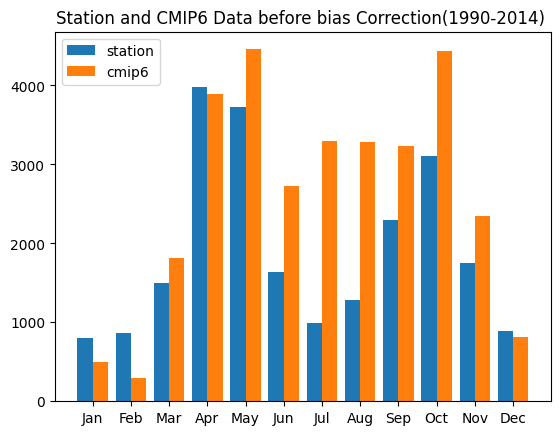

In [16]:
# Monthly, averaged over all years
s_m = station_model.reset_index()
monthly = s_m.drop(columns=['year','day','date']).groupby(by='month').sum()
month_names = pd.date_range('1 jan 2020','31 dec 2020',freq='M').strftime('%b')

fig,ax=plt.subplots()
ax.bar(monthly.index-0.4,monthly.station,width=0.4,align='edge',label='station')
ax.bar(monthly.index,monthly.cmip6,width=0.4,align='edge',label='cmip6')
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(month_names)
ax.set_title('Station and CMIP6 Data before bias Correction(1990-2014) ')
ax.legend()